### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [121]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Problems

Use the prompts below to get started with your data analysis.  

**1. Read in the `coupons.csv` file.**




In [3]:
data = pd.read_csv('C:/Users/hande/Downloads/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data.**

In [5]:
df= data.copy()

In [6]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [8]:
# Dataset structural information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [9]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [45]:
# Convert Objects to Categorical:
import pandas as pd 
df.destination = pd.Categorical(df.destination)
df.passanger = pd.Categorical(df.passanger)
df.weather  = pd.Categorical(df.weather)
df.time = pd.Categorical(df.time)
df.coupon = pd.Categorical(df.coupon)
df.expiration = pd.Categorical(df.expiration)
df.gender = pd.Categorical(df.gender)
df.age = pd.Categorical(df.age)
df.maritalStatus = pd.Categorical(df.maritalStatus)
df.education = pd.Categorical(df.education)
df.occupation = pd.Categorical(df.occupation)
df.income= pd.Categorical(df.income)
df.car = pd.Categorical(df.car)
df.Bar  = pd.Categorical(df.Bar)
df.CoffeeHouse = pd.Categorical(df.CoffeeHouse)
df.CarryAway  = pd.Categorical(df.CarryAway )
df.RestaurantLessThan20  = pd.Categorical(df.RestaurantLessThan20 )
df.RestaurantLessThan20  = pd.Categorical(df.RestaurantLessThan20 )

In [46]:
df.dtypes

destination             category
passanger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
car                     category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50          object
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [47]:
df.shape

(12684, 26)

In [48]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


3. Decide what to do about your missing data -- drop, replace, other...

In [55]:

df.isnull().values.any()

True

In [56]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [57]:
# drop all those rows which 
# have any 'nan' value in it.
df.dropna(inplace = True)

In [58]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [92]:
df.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,108.0,62.870370,17.971989,30.0,55.0,55.0,80.0,80.0
has_children,108.0,0.398148,0.491798,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,108.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,108.0,0.611111,0.489771,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,108.0,0.129630,0.337461,0.0,0.0,0.0,0.0,1.0
direction_same,108.0,0.129630,0.337461,0.0,0.0,0.0,0.0,1.0
direction_opp,108.0,0.870370,0.337461,0.0,1.0,1.0,1.0,1.0
Y,108.0,0.574074,0.496788,0.0,0.0,1.0,1.0,1.0


In [59]:
cat_df = df.select_dtypes(include = ["object"])

In [60]:
cat_df.head(5)

,Restaurant20To50
1237,never
1238,never
1239,never
1240,never
1241,never


In [62]:
cat_df.tail(5)

,Restaurant20To50
8293,less1
8294,less1
8295,less1
8296,less1
8297,less1


In [65]:
# Accessing the Classes and Number of Classes of a Categorical Variable:
cat_df.Restaurant20To50.unique()

array(['never', 'less1', '1~3'], dtype=object)

In [67]:
cat_df.dtypes

Restaurant20To50    object
dtype: object

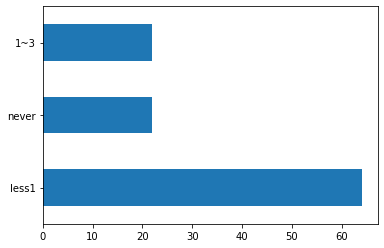

In [69]:
df['Restaurant20To50'].value_counts().plot.barh();

In [70]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [71]:
df_num.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,55,0,1,0,0,0,1,1
1238,80,0,1,0,0,0,1,0
1239,80,0,1,0,0,0,1,1
1240,80,0,1,1,0,0,1,0
1241,80,0,1,0,0,0,1,1


In [72]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,108.0,62.870370,17.971989,30.0,55.0,55.0,80.0,80.0
has_children,108.0,0.398148,0.491798,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,108.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,108.0,0.611111,0.489771,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,108.0,0.129630,0.337461,0.0,0.0,0.0,0.0,1.0
direction_same,108.0,0.129630,0.337461,0.0,0.0,0.0,0.0,1.0
direction_opp,108.0,0.870370,0.337461,0.0,1.0,1.0,1.0,1.0
Y,108.0,0.574074,0.496788,0.0,0.0,1.0,1.0,1.0


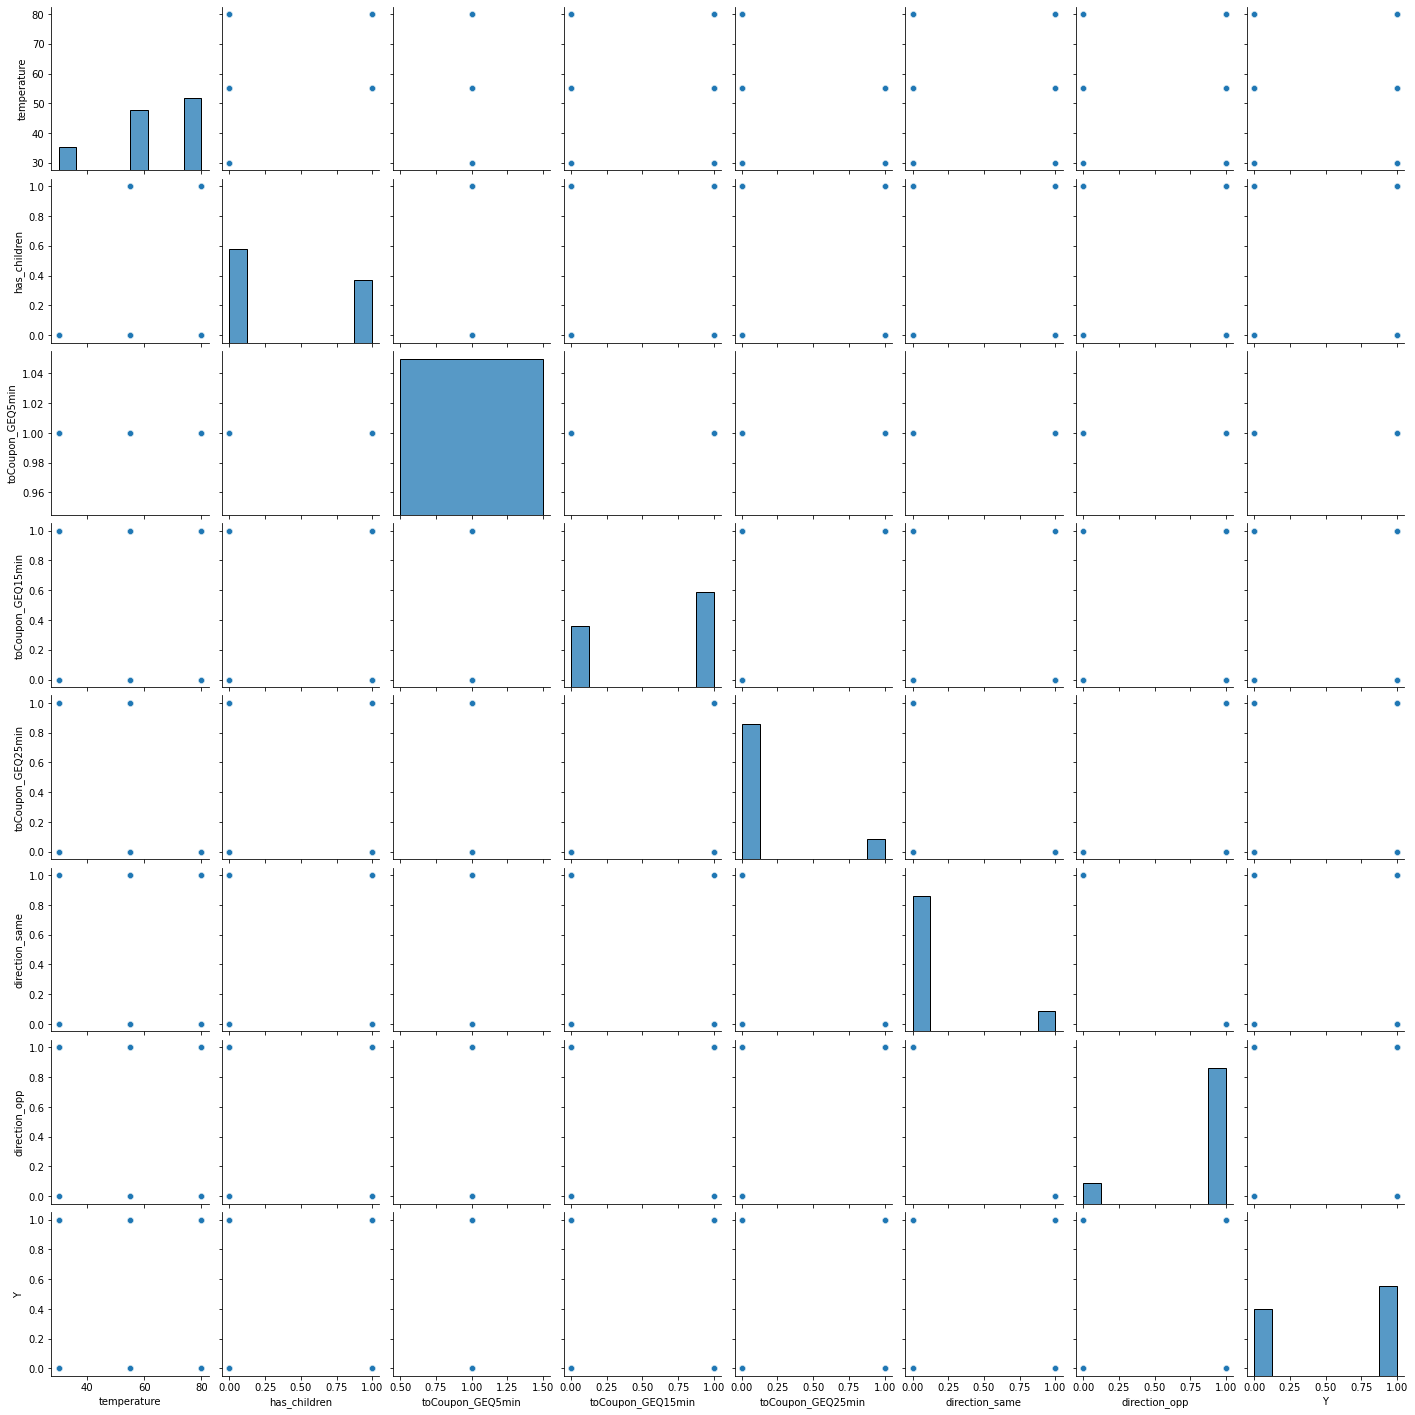

In [113]:
sns.pairplot(df);

**4. What proportion of the total observations chose to accept the coupon?**



In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           108 non-null    category
 1   passanger             108 non-null    category
 2   weather               108 non-null    category
 3   temperature           108 non-null    int64   
 4   time                  108 non-null    category
 5   coupon                108 non-null    category
 6   expiration            108 non-null    category
 7   gender                108 non-null    category
 8   age                   108 non-null    category
 9   maritalStatus         108 non-null    category
 10  has_children          108 non-null    int64   
 11  education             108 non-null    category
 12  occupation            108 non-null    category
 13  income                108 non-null    category
 14  car                   108 non-null    category
 15  Ba

In [74]:
df['coupon'].value_counts()

Coffee House             37
Restaurant(<20)          25
Carry out & Take away    19
Restaurant(20-50)        14
Bar                      13
Name: coupon, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

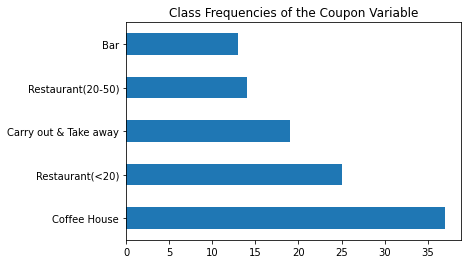

In [75]:
df['coupon'].value_counts().plot.barh().set_title('Class Frequencies of the Coupon Variable');

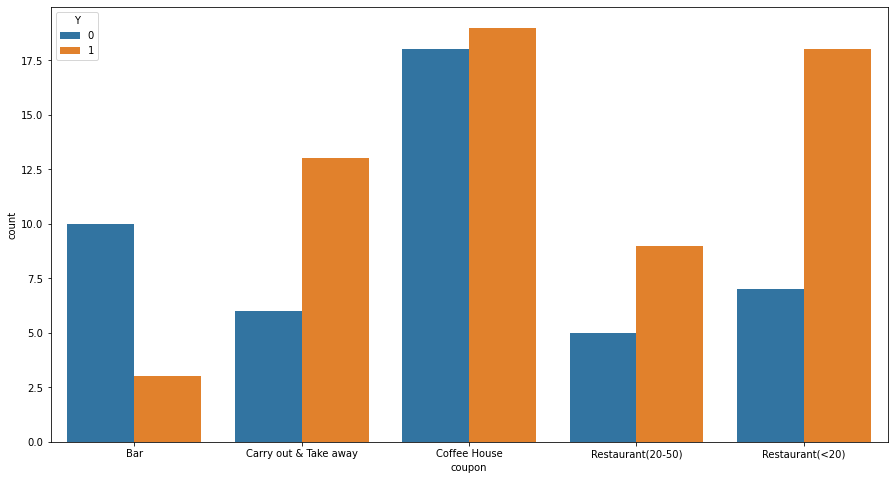

In [116]:
#labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.

plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'coupon', hue = 'Y', data = df)

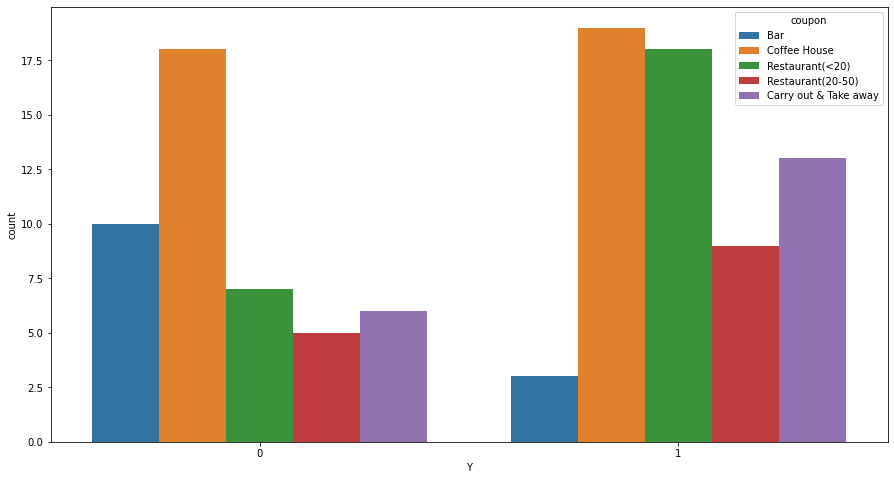

In [118]:
plt.figure(figsize = (15,8))
hue_order = ['Bar', 'Coffee House', 'Restaurant(<20)', "Restaurant(20-50)", 'Carry out & Take away']
x = sns.countplot(x = 'Y', hue = 'coupon',  data = df, hue_order = hue_order)

**6. Use a histogram to visualize the temperature column.**

In [131]:
# The Best way to figure it out "labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’";
#according to temperature classification:

df1 = df.groupby(['temperature','Y']).size().unstack(fill_value=0)
print(type(df1))
df1

<class 'pandas.core.frame.DataFrame'>


Y,0,1
temperature,,
30,6,10
55,18,24
80,22,28


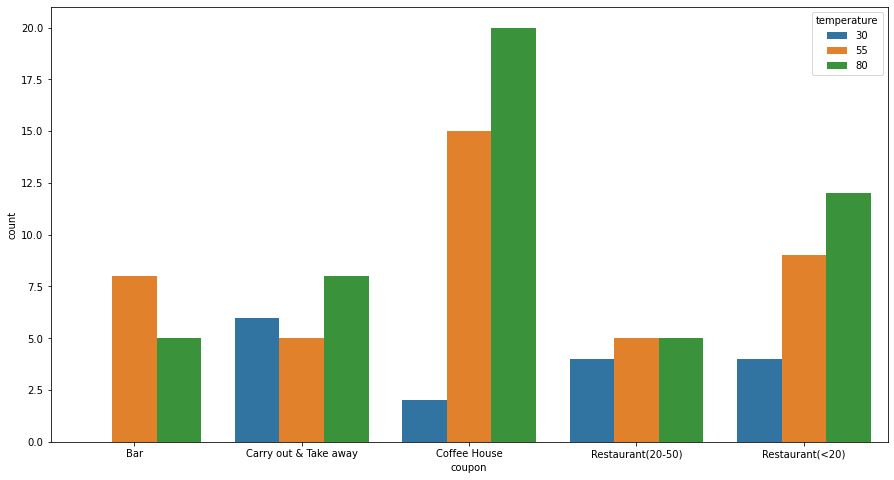

In [126]:
# When Temperature 80F and 55F;Coofee House coupons are more likely to be accepted

plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'coupon', hue = 'temperature', data = df)

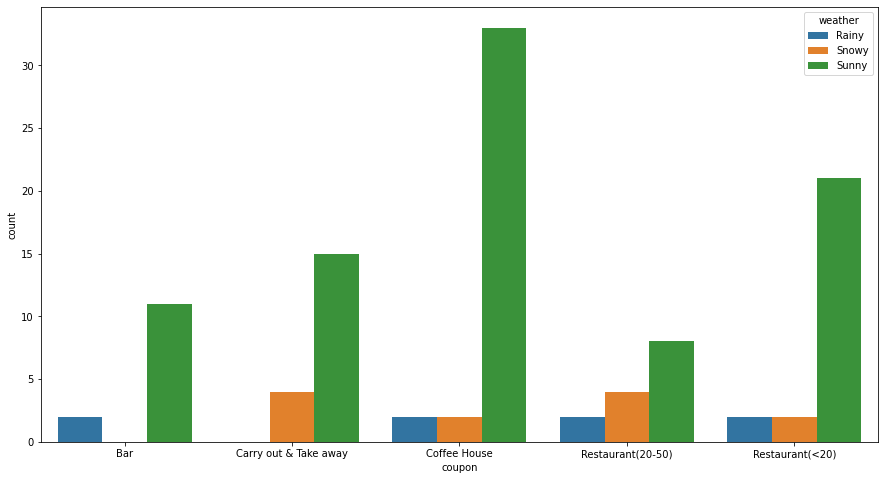

In [127]:
# Weather: sunny, rainy, or snowy
# Sunny and hot days are prominent in coupon preference.
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'coupon', hue = 'weather', data = df)

In [128]:
df['weather'].value_counts()

Sunny    88
Snowy    12
Rainy     8
Name: weather, dtype: int64

In [129]:
df['weather'].value_counts()

Sunny    88
Snowy    12
Rainy     8
Name: weather, dtype: int64

# Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

**1. Create a new `DataFrame` that contains just the bar coupons.**


In [135]:
# Creating a new Dataframe for the bar coupons:
d_b = df.query("coupon == 'Bar'")
d_b

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1250,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,1,0,0
1254,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,1,1,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0
2621,Work,Alone,Sunny,55,7AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,0
3101,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,0,0,1,0
3105,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,0,0,1,0,0
3109,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,1,0,1,0
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1


In [150]:
d_b['coupon'].value_counts()

Bar                      13
Carry out & Take away     0
Coffee House              0
Restaurant(20-50)         0
Restaurant(<20)           0
Name: coupon, dtype: int64

**2. What proportion of bar coupons were accepted?**


In [151]:
# Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ 
# and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’

d_b['Y'].value_counts()

0    10
1     3
Name: Y, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

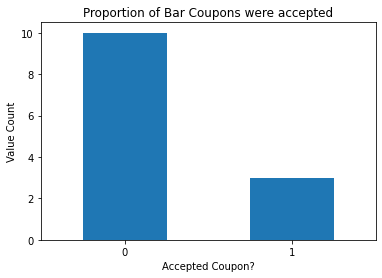

In [152]:
d_b['Y'].value_counts()
d_b['Y'].value_counts().plot(kind = 'bar')
plt.xlabel('Accepted Coupon?')
plt.ylabel('Value Count')
plt.title('Proportion of Bar Coupons were accepted')
plt.xticks(rotation = 'horizontal')

In [153]:
# 77% of proportion of bar coupons were accepted:

d_b['Y'].value_counts(normalize = True)

0    0.769231
1    0.230769
Name: Y, dtype: float64

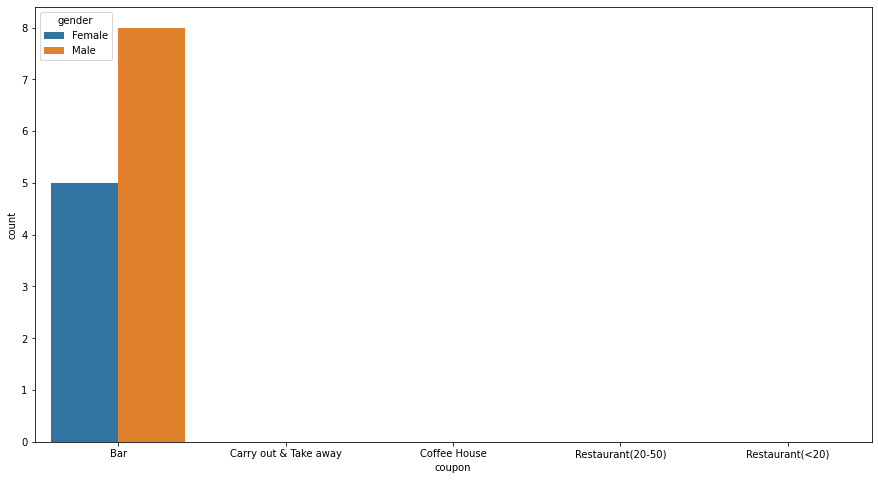

In [154]:
# Gender: Male use bar coupons more than female.
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'coupon', hue = 'gender', data = d_b)

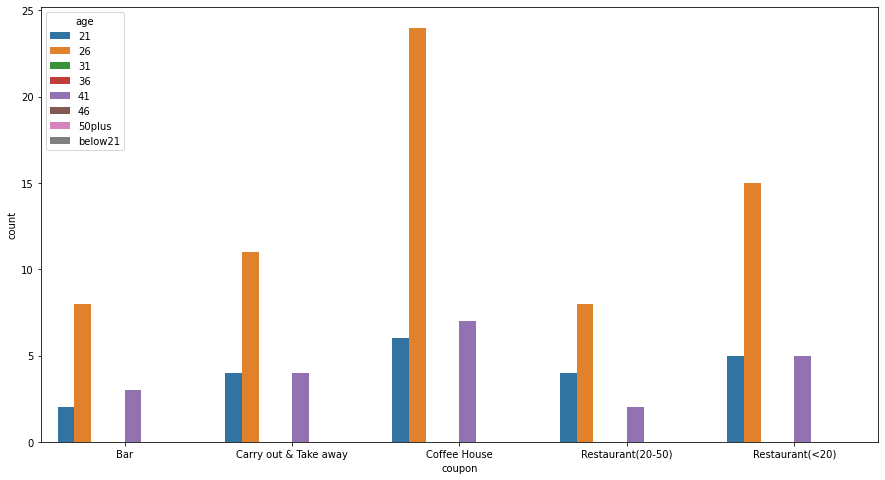

In [139]:
# Age of 26 prefer more bar coupons:
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'coupon', hue = 'age', data = df)

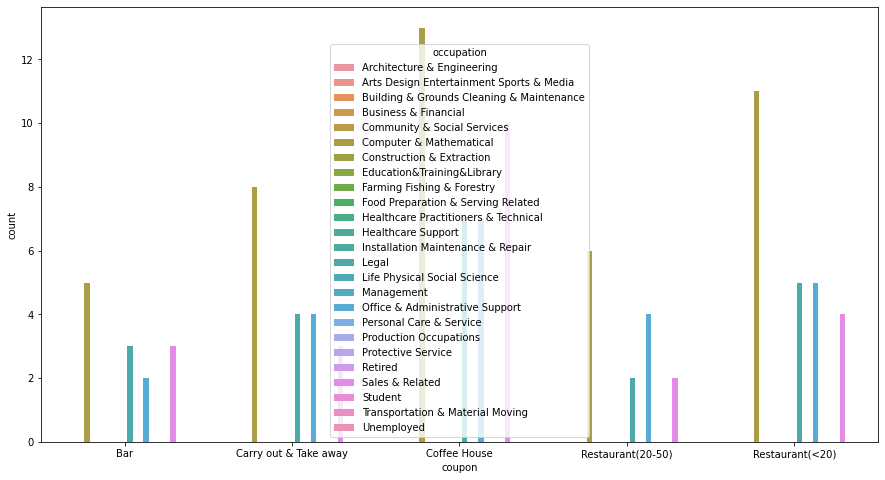

In [145]:
# Occupation:
# Age of 26 prefer more bar coupons:
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'coupon', hue = 'occupation', data = df)

In [149]:
df_bc = df.groupby(['age','gender','Y']).size().unstack(fill_value=0)
df_bc

Y                0   1
age     gender        
21      Female   0   0
        Male     4  17
26      Female  12  10
        Male    17  27
31      Female   0   0
        Male     0   0
36      Female   0   0
        Male     0   0
41      Female  13   8
        Male     0   0
46      Female   0   0
        Male     0   0
50plus  Female   0   0
        Male     0   0
below21 Female   0   0
        Male     0   0

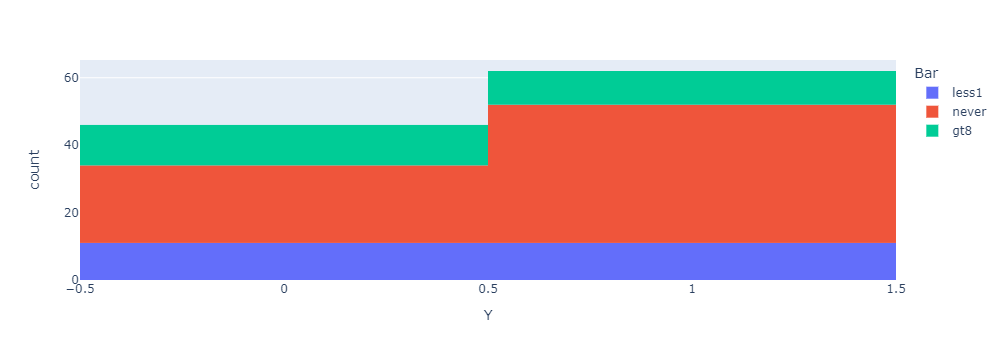

In [159]:
# Demonstrating the participation of customers; who wants bar coupon (Y=1), who dont want it (Y=0):

fig_1= px.histogram(df, x="Y", color="Bar")
fig_1.show()

In [162]:
df_y = df.groupby(['Bar','Y']).size().unstack(fill_value=0)
df_y

Y,0,1
Bar,,
1~3,0,0
4~8,0,0
gt8,12,10
less1,11,11
never,23,41


**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


In [163]:
# Previously created Dataframe for the bar coupons:
d_b = df.query("coupon == 'Bar'")
d_b

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1250,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,1,0,0
1254,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,1,1,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0
2621,Work,Alone,Sunny,55,7AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,0
3101,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,0,0,1,0
3105,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,0,0,1,0,0
3109,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,1,1,0,1,0
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,less1,1~3,1~3,1~3,1,1,0,0,1,1


In [176]:
# Frequency of going to bar: (greater than 3) and infrequent(less than 4)


def calculation_new_col(row):
    if row['Bar'] == 'never' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == 'less1' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == '1~3' :
        return 'Less than or Equal to 3'
    elif row['Bar'] == '4~8' :
        return 'Greater than 3'
    elif row['Bar'] == 'gt8' :
        return 'Greater than 3'
        
df['gotobar'] = df.apply(calculation_new_col, axis = 1)
df['gotobar'] = df.apply(calculation_new_col, axis = 1)

df.gotobar.value_counts()

Less than or Equal to 3    86
Greater than 3             22
Name: gotobar, dtype: int64

<AxesSubplot:xlabel='Y', ylabel='count'>

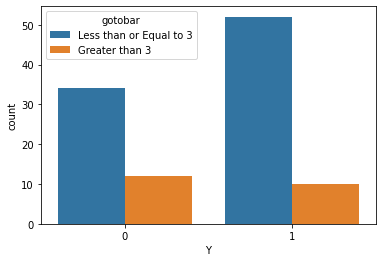

In [177]:

sns.countplot(x = 'Y', hue = 'gotobar',  data = df)

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


In [182]:
# If we rearrange the Age column:
def calculation_new_col2(row):
    if row['age'] == 'below21' :
        return 'Under 21'
    elif row['age'] == '21' :
        return 'Age 21 to 25'
    elif row['age'] == '26' :
        return 'Age 26 to 30'
    elif row['age'] == '31' :
        return 'Age 31 to 35'
    elif row['age'] == '36' :
        return 'Age 36 to 40'
    elif row['age'] == '41' :
        return 'Age 41 to 45'
    elif row['age'] == '46' :
        return 'Age 46 to 50'
    elif row['age'] == '50plus' :
        return 'Over 50'
        
df['ages'] = df.apply(calculation_new_col2, axis = 1)
d_b['ages'] = d_b.apply(calculation_new_col2, axis = 1)

C:\Users\hande\AppData\Local\Temp\ipykernel_5948\476773547.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
# Drivers who go to bar more than once and over age of 25:
df.age.unique()
df.Bar.unique()
bar_gt1_over25  = d_b.loc[((df['Bar'] == '1~3') | (df['Bar'] == '4~8') | (df['Bar'] == 'gt8')) & \
                           ((df['ages'] == 'Age 26 to 30') | (df['ages'] == 'Age 31 to 35') | \
                           (df['ages'] == 'Age 36 to 40') | (df['ages'] == 'Age 41 to 45') | \
                           (df['ages'] == 'Age 46 to 50') | (df['ages'] == 'Over 50'))]
bar_gt1_over25.shape[0]

2

In [184]:
# find drivers that go less than once per month and are under the age of 25
bar_lt1_under25 = d_b.loc[((df['Bar'] != '1~3') & (df['Bar'] != '4~8') &(df['Bar'] != 'gt8')) & \
                           ((df['ages'] != 'Age 26 to 30') & (df['ages'] != 'Age 31 to 35') & \
                           (df['ages'] != 'Age 36 to 40') & (df['ages'] != 'Age 41 to 45') & \
                           (df['ages'] != 'Age 46 to 50') & (df['ages'] != 'Over 50'))]
bar_lt1_under25.shape[0]

2

In [185]:
# Acceptance rate (AR) among bar coupons:
d_b['Y'].value_counts(normalize = True)

0    0.769231
1    0.230769
Name: Y, dtype: float64

In [186]:
# AR that go less than once per month and are 25 or under:
bar_lt1_under25['Y'].value_counts(normalize = True)

0    1.0
Name: Y, dtype: float64

In [187]:
# AR that go to bars more than once and are over 25:
bar_gt1_over25['Y'].value_counts(normalize = True)

1    1.0
Name: Y, dtype: float64

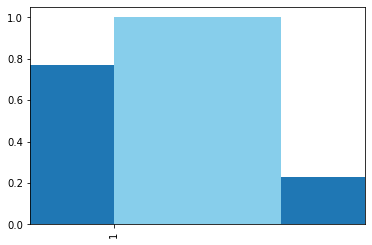

In [193]:
width = .50
d_b['Y'].value_counts(normalize = True).plot(kind = 'bar', position = 1, width = width)
bar_gt1_over25['Y'].value_counts(normalize = True).plot(kind = 'bar', color = 'skyblue', position = 0, width = width)
plt.show()

<AxesSubplot:>

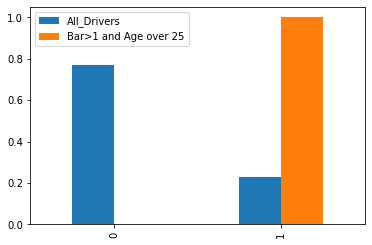

In [195]:
# Over the age of 25, drivers go to frequently to bars (more than 1) and likely  to accept the bar coupon.

df_ratio = d_b['Y'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar_gt1_over25['Y'].value_counts(normalize = True).rename('Bar>1 and Age over 25').to_frame())

df_ratio.plot(kind = 'bar')

In [197]:
# 77% of them said No, 23% said yes:
df_ratio

,All_Drivers,Bar>1 and Age over 25
0,0.769231,NaN
1,0.230769,1.0


**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


In [198]:
df['passanger'].unique()
df['occupation'].unique()

['Sales & Related', 'Legal', 'Computer & Mathematical', 'Office & Administrative Support']
Categories (25, object): ['Architecture & Engineering', 'Arts Design Entertainment Sports & Media', 'Building & Grounds Cleaning & Maintenance', 'Business & Financial', ..., 'Sales & Related', 'Student', 'Transportation & Material Moving', 'Unemployed']

In [201]:
# Drivers=> bars>1 no kids passengers had occupations other than farming, fishing, or forestry:


occupations_notfff = ['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       ]
bar_1_nokid_ocnotfff = d_b.loc[((df['Bar'] == '1~3') | (df['Bar'] == '4~8') | (df['Bar'] == 'gt8')) & \
                           ((df['passanger'] == 'Friend(s)') | (df['passanger'] == 'Partner')) & \
                            (df['occupation'] != 'Farming Fishing & Forestry')]

bar_1_nokid_ocnotfff

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,bargoers,ages
7313,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,26,Single,...,1~3,1~3,1,1,0,0,1,1,Greater than 3,Age 26 to 30


<AxesSubplot:>

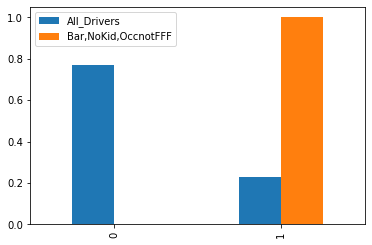

In [203]:
df_ratio2 = d_b['Y'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar_1_nokid_ocnotfff['Y'].value_counts(normalize = True).rename('Bar,NoKid,OccnotFFF').to_frame())

df_ratio2.plot(kind = 'bar')

In [204]:
df_ratio2

,All_Drivers,"Bar,NoKid,OccnotFFF"
0,0.769231,NaN
1,0.230769,1.0


**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [212]:
# 3 Types of Drivers:
bar1_nokid_notwidow = d_b.loc[((df['Bar'] == '1~3') | (df['Bar'] == '4~8') | (df['Bar'] == 'gt8')) & \
                           ((df['passanger'] == 'Friend(s)') | (df['passanger'] == 'Partner')) & \
                            (df['maritalStatus'] != 'Widowed')]

bar1_under30 = d_b.loc[((df['Bar'] == '1~3') | (df['Bar'] == '4~8') | (df['Bar'] == 'gt8')) & \
                           ((df['ages'] == 'Age 26 to 30') | (df['ages'] == '21 to 25') | \
                           (df['ages'] == 'Under 21'))]

cheaprest4_incomeunder50 = d_b.loc[((df['RestaurantLessThan20'] == '4~8') | (df['Bar'] == 'gt8')) & \
                                     ((df['income'] == '$37500 - $49999' ) | (df['income'] == '$12500 - $24999') | \
                                      (df['income'] == 'Less than $12500'))]

d_b['RestaurantLessThan20'].unique()

['1~3', 'less1']
Categories (5, object): ['1~3', '4~8', 'gt8', 'less1', 'never']

<AxesSubplot:>

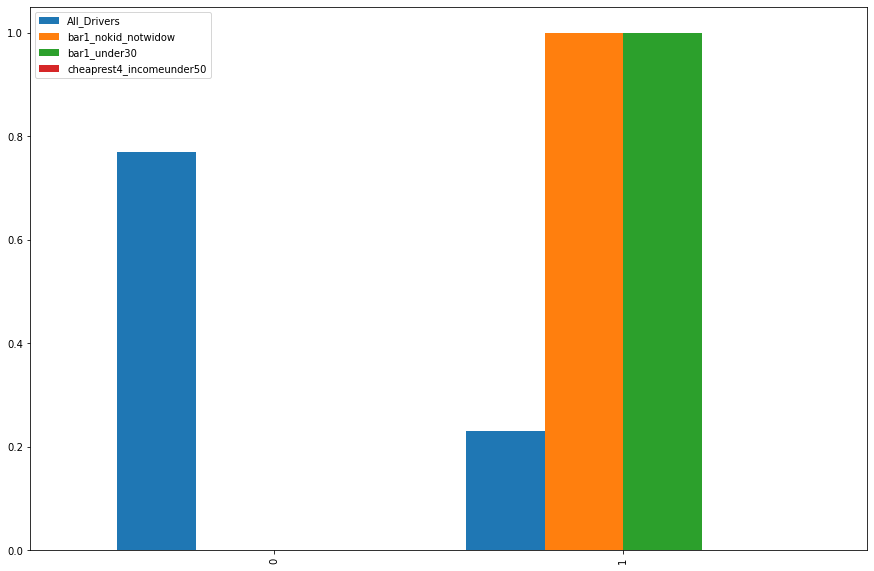

In [213]:
# create and plot one dataframe from info needed
df_ratio3 = d_b['Y'].value_counts(normalize = True).rename('All_Drivers').to_frame() \
            .join(bar1_nokid_notwidow['Y'].value_counts(normalize = True).rename('bar1_nokid_notwidow').to_frame()) \
            .join(bar1_under30['Y'].value_counts(normalize = True).rename('bar1_under30').to_frame()) \
            .join(cheaprest4_incomeunder50['Y'].value_counts(normalize = True).rename('cheaprest4_incomeunder50').to_frame())

df_ratio3.plot(kind = 'bar', figsize = (15,10), width = 0.9)

**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# KIDS EFFECTS:

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

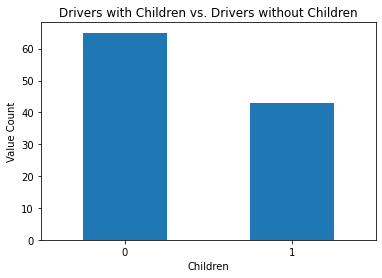

In [207]:
# Having kid or not:
df['has_children'].value_counts()
ax = df['has_children'].value_counts().plot(kind = 'bar')
plt.xlabel('Children')
plt.ylabel('Value Count')
plt.title('Drivers with Children vs. Drivers without Children')
plt.xticks(rotation = 0)

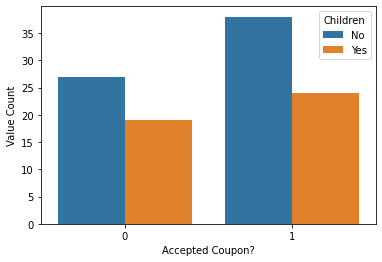

In [209]:
# The effect of having a child on coupon acceptance:
x = sns.countplot(x = 'Y', hue = 'has_children',  data = df)
ax.set(title = "Accepting Coupons with and without Kids")
plt.xlabel('Accepted Coupon?')
plt.ylabel('Value Count')
plt.xticks(rotation = 'horizontal')
plt.legend(title = "Children", labels = ['No', 'Yes'])

In [211]:
df_kid = df.groupby(['has_children','Y']).size().unstack(fill_value=0)
df_kid

Y,0,1
has_children,,
0,27,38
1,19,24
